# PCA

*Credit to linear algebra and its application*

## Problem formulation

Let $X = [x_1, x_2, x_3, ... , x_N]$ be a pxN matrix where samples are the columns of the matrix, each sample contains p
features. Let $m = \frac{1}{N} (x_1 + x_2 + ... + x_N)$ be the sample mean and we center each $x_i$ by $\hat x_i = x_i - m$

Let B be the new pxN matrix consists of centered samples $\hat x_i$: $B = [\hat x_1, ..., \hat x_N]$, then B has zero
sample mean.

Then $S = \text{sample covariance matrix} = \frac{1}{N - 1} (X - M)(X - M)^T = \frac{1}{N -1} BB^T$ where $M = [m, m, ...]$
is a pxN matrix.

Notice that, the variance are on the diagonal of S, that is, the total variance of the data is the sum of the variance
on the diagonal of S:

$\text{Total variance} = tr(S)$

## Goal

The goal of PCA is to find an orthogonal pxp matrix $P = [u_1, ...., u_p]$ that determines a projection of X to a lower
dimensional space, that is

$\hat x_k = \begin{pmatrix}
\hat x_k^1\\
. \\
.\\
\hat x_k^p
\end{pmatrix} = P y_k = [u_1, ...., u_p]
\begin{pmatrix}
y_k^1\\
. \\
.\\
y_k^p
\end{pmatrix}$

where $\hat x_k^i$ indicates the ith feature of $\hat x_k$, and with the property that the new elements $y_k^1, ..., y_k^p$
are uncorrelated and are arranged in decreasing variance order.

$\implies y_k = P^{-1}\hat x_k = P^T \hat x_k$
$\implies Y Y^T = P^T B B^T P = P^T S P \implies \text{The covariance matrix of Y is } P^T S P$

Where $Y = [y_1, y_2, ..., y_N]$

Since $S$ is symmetric, if $P$ is the orthogonal matrix of the eigen-decomposition of $S = PDP^T$

$\implies Y Y^T = P^TPDP^TP = D$

Where $D$ is a diagonal matrix with eigenvalues of $S$ on the diagonal

## Principle Component

The orthogonal matrix $P$ contains the unit eigenvectors $u_1, ..., u_p$ of the covariance matrix $S$ as columns, $u_1,
u_2, ..., u_p$ are called principle components.

The first PC is the eigenvector corresponding to the largest eigenvalue of $S$ and so on

The first PC $u_1$ determine the new variable $y_i$ in the following way, $u_1$ is the first row of $P^T$, let $c_1, c_2
..., c_p$ be the elements of $u_1$, then

$y_k = P^T \hat x_k$ shows that $y_k^1 = c_1 x_k^1 + c_2 x_k^2 + ... + c_p x_k^p$

That is, $y_k^i$ is just the dot product of $u_i$ and $x_k$

**If you have a Nxp matrix X, with samples as rows, then the ith feature $y^i = Xu_i$**

So, the stretching effect(Variance) is largest at $u_1$ with magnitude $\lambda_1$.

## Variance

Since $tr(YY^T) = tr(P^TSP) = tr(P^TPS) = tr(S)$, the total variance preserves after the projection from X to Y

Thus, the variance of $\lambda_i$ and $\frac{\lambda_i}{tr(S)}$ measures the total variance that is captured by $u_i$

## SVD

### Singular values

The singular values of a Nxm matrix $A$ are the square roots of the eigenvalues of $A^TA$, denoted by $\sigma_1, \sigma_2, ..., \sigma_m$
in descending order. That is, $\sigma_i = \sqrt{\lambda_i}$ where $\lambda_i$ is the ith eigenvalue of $A^TA$

Since $\|A v_i\|^2 = v_i^TA^TAv_i = v_i^T\lambda_i v_i = \lambda_i$ where $v_i$ is the ith eigenvector of $A^TA$, we can see that
 $\sigma_i$ is the length of $Av_i$

Since all eigenvalues of $A^TA$ are non-negative, by the result above, the singular values of matrix $A$ are $\|A v_i\|$, which we
can see that this is the same as the transformed feature i by PCA, $y^i = Av_i$.

### Singular value decomposition

Let A be a Nxm matrix with rank r. Then there exists an Nxm matrix $\Sigma$ for which the diagonal entries in D are the first r
singular values of A, $\sigma_1 \geq, ...., \geq \sigma_r > 0$, and there exists an NxN orthogonal matrix $U$ and mxm orthogonal matrix
$V$ such that,

$A = U\Sigma V^T$

Where $U \text{ and } V$ are not uniquely determined by A

1. The columns of $U$ are called left singular values of $A$
2. The columns of $V$ are called right singular values of $A$


The Nxm "diagonal" matrix $\Sigma$ of the form:

1. D on the upper left corner of $\sigma$
2. The remaining of N-r rows are 0
3. The remaining of m-r columns are 0

where D is a rxr diagonal matrix for some r not exceeding the smaller of m and n, if r=m or r=n or r=m=n, the remaining 0
columns or rows or both will disappear

### Construct $U, \Sigma, V$

Since $A^TA = V\Sigma U^TU\Sigma V^T = V \Sigma V^T$, so let $V$ be the unit eigenvectors of $A^TA$ stack as columns and
$\Sigma$ be singular values of A on the diagonal in decreasing order, also let the columns of $U$ be $\frac{1}{\sigma_i}Av_i$ we
also obtain a orthogonal matrix. (i.e $\{Av_1, ..., Av_r\}$ are orthogonal basis for the column space of A) However, if rank r < N,
we will need to generate other orthogonal basis for $\{Av_1, ..., Av_r\}$

## Back to PCA

From the above results, we can use SVD to compute the eigenvalues and eigenvectors of the covariance matrix S. Thus,
the eigenvectors of S are on the columns of $V^T$, the square root of eigenvalues are on the diagonal of $\Sigma$ and most importantly,
we can obtain transformed features $y^i$ directly from the columns of $U$ (i.e $y^i = u_i * \sigma_i$, because $u_i$ is a unit vector)

In [3]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()

In [4]:
def pca(X, k=2):

    u, s, vt = np.linalg.svd(X, full_matrices=False)
    xv = u * s

    return xv[:, :k]

def normalize(X):

    n, d = X.shape
    x_trans = X.copy()

    for j in range(d):

        # normalization
        x_trans[:, j] = (X[:, j] - X[:, j].mean()) / X[:, j].std()

    return x_trans

In [5]:
X = data['data']
y = data['target']
x_trans = normalize(X)
x_pca = pca(x_trans)


Text(0, 0.5, 'Xu2')

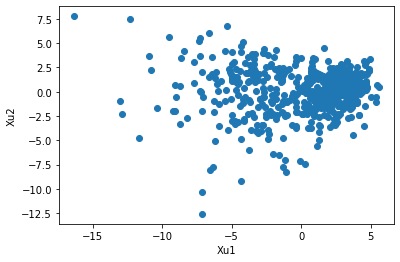

In [6]:
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.xlabel('Xu1')
plt.ylabel('Xu2')